<ipython-input-1-9596fa39277c>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_30['Country'],rotation=90)


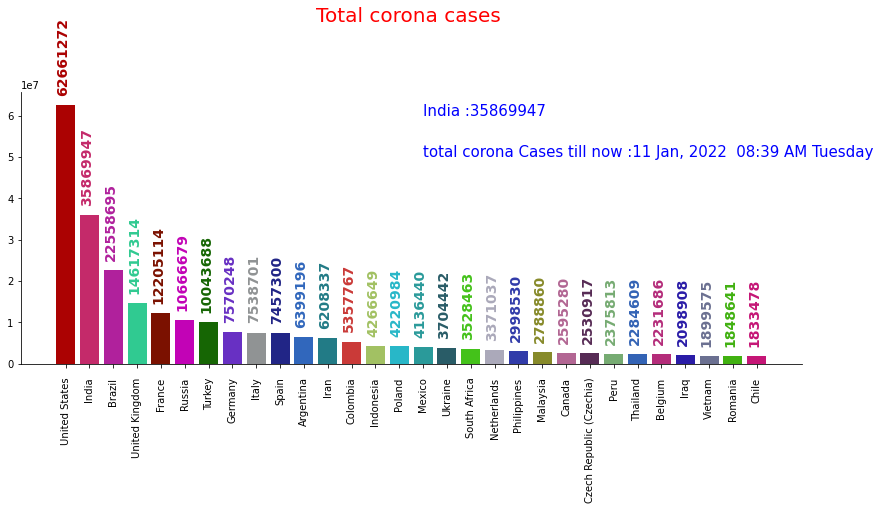

In [1]:
url='https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'
import requests
r=requests.get(url)
#getting data from site(Web Scrapping)

import random
colors=[]
import time
def makecolor():
    p=['1','2','3','4','5','6','7','8','9','0','a','b','c']
    color='#'
    for i in range(6):
        color=color+random.choice(p)
    return color

while len(colors)!=30:
    c=makecolor()
    if c not in colors:
        colors.append(c)
        
#Making Color for plt

import pandas as pd
df=pd.read_html(r.content)
df=df[0]
df=df.drop('Region',axis=1)
df_sort=df.sort_values(by='Cases',ascending=False)
top_30=df_sort[:30]
india=top_30[top_30['Country']=='India']['Cases'].values[0]

#data sets in dataframe And sorting in list of 30 by its cases in descending values

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,5)                             #fig size (l,h)
plt.rcParams['xtick.major.pad']=10                                #
fig,ax=plt.subplots()
ax.bar(top_30['Country'],top_30['Cases'],color=colors)            #Show country and cases on  x bar
ax.set_xticklabels(top_30['Country'],rotation=90)                 #rotate lable bar name on x bar 90degree 
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.set_title('Total corona cases ',pad=70,fontsize=20,color='red')    #heading

#plot 
#ax.spines['bottom'].set_visible(False)

for patch,color,lb in zip(ax.patches,colors,ax.get_xticklabels()):
    x=patch.get_x()
    y=patch.get_height()
    a=y+3000000
    ax.text(x,a,y,color=color,rotation=90,fontsize=14,fontweight='bold')                  #name on every bar 
ax.text(15,50000000,f"total corona Cases till now :{time.strftime('%d %b, %Y  %I:%M %p %A')}",fontsize=15,color='blue') #live time showing
ax.text(15,60000000,f"India :{india}",fontsize=15,color='blue')                    #highlight india country cases on time
plt.show()

<ipython-input-12-259342fe1720>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_30['Country'],rotation=90)


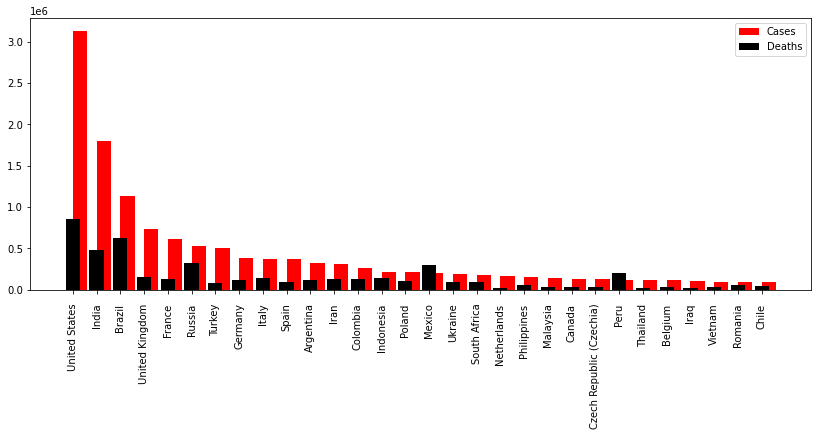

In [12]:
#cases and death 

plt.rcParams['figure.figsize']=(14,5)
fig,ax=plt.subplots()

ax.bar(top_30['Country'],(top_30['Cases'])/20,width=0.6,align='edge',color='red',label='Cases')
random.shuffle(colors)
ax.bar(top_30['Country'],top_30['Deaths'],width=0.6,color='black',label='Deaths')
ax.set_xticklabels(top_30['Country'],rotation=90)
plt.legend()
plt.show()